In [1]:
import platform
import datetime
import sys
import os


your_name, your_code, work_counter = "杜培博", 200507340136, 5
print(f'我是：{your_name}，学号：{your_code}，这是我的第 {work_counter} 次作业。')
print('现在是', datetime.datetime.now())
print('我的机器信息如下：')
print(platform.uname())

print('\n当前工作目录：')
print(os.getcwd())
print('\n当前目录的文件信息如下：')
print(os.listdir())
print('\n我安装包的情况:')
!pip list

我是：杜培博，学号：200507340136，这是我的第 5 次作业。
现在是 2021-10-10 20:23:17.684438
我的机器信息如下：
uname_result(system='Windows', node='LAPTOP-5PHEQ8I3', release='10', version='10.0.18362', machine='AMD64', processor='AMD64 Family 23 Model 24 Stepping 1, AuthenticAMD')

当前工作目录：
E:\jupyter\curriculum_code\da_tow\week_05

当前目录的文件信息如下：
['.ipynb_checkpoints', 'Untitled.ipynb', 'Untitled1.ipynb']

我安装包的情况:
Package                            Version

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.



---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
audioread                          2.1.9
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
baidu-aip                          2.2.18.0
bcrypt                           

# 机器学习第四次作业补交(bolo注释未交)

# 二维的bolo注释：

In [2]:
# 导入包
import matplotlib.pyplot as plt     # 画图的包
import numpy as np     
import pylab as mpl  # import matplotlib as mpl
from sklearn.datasets import make_blobs   # 产生数据集

Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 253 ('font.family:  sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 261 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 404 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


In [3]:
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [4]:
n_samples = 1500  # 生成1500个数据集
random_state = 170  # 170这个是随机种子
X, y = make_blobs(n_samples=n_samples, random_state=random_state)    # 生成数据集，包括1500个样本
ages = np.vstack((X[y == 0][:500], X[y == 1][:500], X[y == 2][:500]))   # 将数据进行堆叠，shape为(1500, 2)
y = np.array(([0] * 500 + [1] * 500 + [2] * 500))  #生成0 1 2 各500个

In [5]:
ages.shape

(1500, 2)

In [6]:
k = 3  # 超参数

In [7]:
np.random.seed(26)    #给numpy设置一个随机种子，保证每次都能产生相同的值

In [8]:
centers = np.zeros([3, 2])    # 生成0矩阵
centers_random = np.random.choice(range(len(y)), 3)  # 迭代起点
centers_new = ages[centers_random]   # 随机选取中心
dis_to_cent = np.zeros((k, len(ages)))  # 一个二维数据，相当于一个空的容器

In [9]:
while not (centers_new == centers).all():
    centers = centers_new.copy()  # 注意python的赋值过程，进行展开讲解，== is 和复制方式
    for ii in range(k):
        dis_to_cent[ii] = np.linalg.norm(ages - centers[ii], axis=1)    # 计算每个数值到中心的距离

    clusters = dis_to_cent.argmin(axis=0)   # 划分出每个类别

    for ii in range(k):   # 重新计算中心
        cluster = ages[clusters == ii]
        centers_new[ii] = ages[clusters == ii].mean(0)

    print(centers, centers_new)
    print(centers_new)
    print('centers_new==centers?', (centers_new == centers).all())
    print()

[[-4.15339075  2.26127044]
 [ 1.52702056 -0.3195373 ]
 [ 5.67676703 -1.83908464]] [[-6.75762141 -2.73020017]
 [ 1.84525852  0.4253321 ]
 [ 4.39769001 -0.74347413]]
[[-6.75762141 -2.73020017]
 [ 1.84525852  0.4253321 ]
 [ 4.39769001 -0.74347413]]
centers_new==centers? False

[[-6.75762141 -2.73020017]
 [ 1.84525852  0.4253321 ]
 [ 4.39769001 -0.74347413]] [[-6.86359894 -2.82525622]
 [ 1.50075368  0.48222053]
 [ 3.66970728 -0.30214221]]
[[-6.86359894 -2.82525622]
 [ 1.50075368  0.48222053]
 [ 3.66970728 -0.30214221]]
centers_new==centers? False

[[-6.86359894 -2.82525622]
 [ 1.50075368  0.48222053]
 [ 3.66970728 -0.30214221]] [[-6.91387122 -2.86892335]
 [ 1.12528224  0.53713014]
 [ 3.17316379 -0.01823619]]
[[-6.91387122 -2.86892335]
 [ 1.12528224  0.53713014]
 [ 3.17316379 -0.01823619]]
centers_new==centers? False

[[-6.91387122 -2.86892335]
 [ 1.12528224  0.53713014]
 [ 3.17316379 -0.01823619]] [[-7.00279938 -2.95423214]
 [ 0.60122668  0.55660753]
 [ 2.8850853   0.14349038]]
[[-7.002799

Text(0.5, 1.0, '聚类的结果')

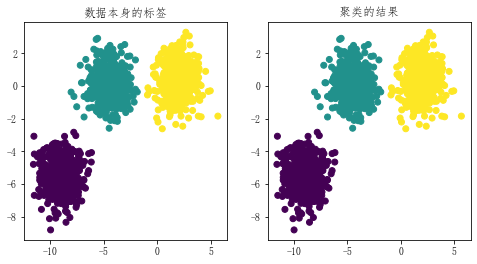

In [10]:
plt.figure(figsize=(8, 4))   #创建画布
ax = plt.subplot(121)  # 几行，几列，第几个，先按行数
ax.scatter(ages[:, 0], ages[:, 1], c=y)  # x, y, 颜色，系统有基本的选择机制，不用写得太细

ax.set_title('数据本身的标签')

ax = plt.subplot(122)  # 几行，几列，第几个，先按行数
ax.scatter(ages[:, 0], ages[:, 1], c=clusters)  # x, y, 颜色，系统有基本的选择机制，不用写得太细

ax.set_title('聚类的结果')


# 任务二：Numpy函数

In [11]:
# 排序函数：numpy.sort(a, axis, kind, order)
# a: 要排序的数组
# axis: 沿着它排序数组的轴，如果没有数组会被展开，沿着最后的轴排序， axis=0 按列排序，axis=1 按行排序
# kind: 默认为'quicksort'（快速排序）
# order: 如果数组包含字段，则是要排序的字段
import numpy as np

a = np.array([[3, 7], [9, 1]])
print('我们的数组是：')
print(a)
print('\n')
print('调用 sort() 函数：')
print(np.sort(a))
print('\n')
print('按列排序：')
print(np.sort(a, axis=0))
print('\n')
# 在 sort 函数中排序字段
dt = np.dtype([('name', 'S10'), ('age', int)])
a = np.array([("raju", 21), ("anil", 25), ("ravi", 17), ("amar", 27)], dtype=dt)
print('我们的数组是：')
print(a)
print('\n')
print('按 name 排序：')
print(np.sort(a, order='name'))

我们的数组是：
[[3 7]
 [9 1]]


调用 sort() 函数：
[[3 7]
 [1 9]]


按列排序：
[[3 1]
 [9 7]]


我们的数组是：
[(b'raju', 21) (b'anil', 25) (b'ravi', 17) (b'amar', 27)]


按 name 排序：
[(b'amar', 27) (b'anil', 25) (b'raju', 21) (b'ravi', 17)]


In [12]:
# numpy.argsort() 函数返回的是数组值从小到大的索引值。
x = np.array([3,  1,  2])  
print (x)
print ('对 x 调用 argsort() 函数：', np.argsort(x) )

[3 1 2]
对 x 调用 argsort() 函数： [1 2 0]


In [13]:
# numpy.lexsort() 用于对多个序列进行排序。把它想象成对电子表格进行排序，每一列代表一个序列，排序时优先照顾靠后的列。

# 这里举一个应用场景：小升初考试，重点班录取学生按照总成绩录取。在总成绩相同时，数学成绩高的优先录取，在总成绩和数学成绩都相同时，按照英语成绩录取…… 这里，总成绩排在电子表格的最后一列，数学成绩在倒数第二列，英语成绩在倒数第三列。
import numpy as np 
 
nm =  ('raju','anil','ravi','amar') 
dv =  ('f.y.',  's.y.',  's.y.',  'f.y.') 
ind = np.lexsort((dv,nm))  
print ('调用 lexsort() 函数：') 
print (ind) 
print ('\n') 
print ('使用这个索引来获取排序后的数据：') 
print ([nm[i]  +  ", "  + dv[i]  for i in ind])

调用 lexsort() 函数：
[3 1 0 2]


使用这个索引来获取排序后的数据：
['amar, f.y.', 'anil, s.y.', 'raju, f.y.', 'ravi, s.y.']


In [14]:
# numpy.argmax() 和 numpy.argmin()函数分别沿给定轴返回最大和最小元素的索引。
import numpy as np 
 
a = np.array([[30,40,70],[80,20,10],[50,90,60]])  
print  ('我们的数组是：') 
print (a) 
print ('\n') 
print ('调用 argmax() 函数：') 
print (np.argmax(a)) 
print ('\n') 
print ('展开数组：') 
print (a.flatten()) 
print ('\n') 
print ('沿轴 0 的最大值索引：') 
maxindex = np.argmax(a, axis =  0)  
print (maxindex) 
print ('\n') 
print ('沿轴 1 的最大值索引：') 
maxindex = np.argmax(a, axis =  1)  
print (maxindex) 
print ('\n') 
print ('调用 argmin() 函数：') 
minindex = np.argmin(a)  
print (minindex) 
print ('\n') 
print ('展开数组中的最小值：') 
print (a.flatten()[minindex]) 
print ('\n') 
print ('沿轴 0 的最小值索引：') 
minindex = np.argmin(a, axis =  0)  
print (minindex) 
print ('\n') 
print ('沿轴 1 的最小值索引：') 
minindex = np.argmin(a, axis =  1)  
print (minindex)

我们的数组是：
[[30 40 70]
 [80 20 10]
 [50 90 60]]


调用 argmax() 函数：
7


展开数组：
[30 40 70 80 20 10 50 90 60]


沿轴 0 的最大值索引：
[1 2 0]


沿轴 1 的最大值索引：
[2 0 1]


调用 argmin() 函数：
5


展开数组中的最小值：
10


沿轴 0 的最小值索引：
[0 1 1]


沿轴 1 的最小值索引：
[0 2 0]


In [15]:
# vnumpy.nonzero() 函数返回输入数组中非零元素的索引。
import numpy as np 
 
a = np.array([[30,40,0],[0,20,10],[50,0,60]])  
print ('我们的数组是：')
print (a)
print ('\n')
print ('调用 nonzero() 函数：')
print (np.nonzero (a))

我们的数组是：
[[30 40  0]
 [ 0 20 10]
 [50  0 60]]


调用 nonzero() 函数：
(array([0, 0, 1, 1, 2, 2], dtype=int64), array([0, 1, 1, 2, 0, 2], dtype=int64))


In [16]:
# numpy.where() 函数返回输入数组中满足给定条件的元素的索引。
import numpy as np 
 
x = np.arange(9.).reshape(3,  3)  
print ('我们的数组是：')
print (x)
print ( '大于 3 的元素的索引：')
y = np.where(x >  3)  
print (y)
print ('使用这些索引来获取满足条件的元素：')
print (x[y])

我们的数组是：
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
大于 3 的元素的索引：
(array([1, 1, 2, 2, 2], dtype=int64), array([1, 2, 0, 1, 2], dtype=int64))
使用这些索引来获取满足条件的元素：
[4. 5. 6. 7. 8.]


In [17]:
# numpy.extract() 函数根据某个条件从数组中抽取元素，返回满条件的元素。
x = np.arange(9.).reshape(3,  3)  
print ('我们的数组是：')
print (x)
# 定义条件, 选择偶数元素
condition = np.mod(x,2)  ==  0  
print ('按元素的条件值：')
print (condition)
print ('使用条件提取元素：')
print (np.extract(condition, x))

我们的数组是：
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
按元素的条件值：
[[ True False  True]
 [False  True False]
 [ True False  True]]
使用条件提取元素：
[0. 2. 4. 6. 8.]


In [18]:
# numpy.ndarray.byteswap() 函数将 ndarray 中每个元素中的字节进行大小端转换
a = np.array([1,  256,  8755], dtype = np.int16)  
print ('我们的数组是：')
print (a)
print ('以十六进制表示内存中的数据：')
print (map(hex,a))
# byteswap() 函数通过传入 true 来原地交换 
print ('调用 byteswap() 函数：')
print (a.byteswap(True))
print ('十六进制形式：')
print (map(hex,a))

我们的数组是：
[   1  256 8755]
以十六进制表示内存中的数据：
调用 byteswap() 函数：
[  256     1 13090]
十六进制形式：


In [19]:
a = np.arange(6)  
print ('我们的数组是：')
print (a)
print ('调用 id() 函数：')
print (id(a))
print ('a 赋值给 b：')
b = a 
print (b)
print ('b 拥有相同 id()：')
print (id(b))
print ('修改 b 的形状：')
b.shape =  3,2  
print (b)
print ('a 的形状也修改了：')
print (a)

我们的数组是：
[0 1 2 3 4 5]
调用 id() 函数：
2775185247328
a 赋值给 b：
[0 1 2 3 4 5]
b 拥有相同 id()：
2775185247328
修改 b 的形状：
[[0 1]
 [2 3]
 [4 5]]
a 的形状也修改了：
[[0 1]
 [2 3]
 [4 5]]


In [20]:
# 视图
a = np.arange(6).reshape(3,2)  
print ('数组 a：')
print (a)
print ('创建 a 的视图：')
b = a.view()  
print (b)
print ('两个数组的 id() 不同：')
print ('a 的 id()：')
print (id(a))
print ('b 的 id()：' )
print (id(b))
# 修改 b 的形状，并不会修改 a
b.shape =  2,3
print ('b 的形状：')
print (b)
print ('a')

数组 a：
[[0 1]
 [2 3]
 [4 5]]
创建 a 的视图：
[[0 1]
 [2 3]
 [4 5]]
两个数组的 id() 不同：
a 的 id()：
2775186073920
b 的 id()：
2775186075440
b 的形状：
[[0 1 2]
 [3 4 5]]
a


In [21]:
# 副本和深拷贝
a = np.array([[10,10],  [2,3],  [4,5]])  
print ('数组 a：')
print (a)
print ('创建 a 的深层副本：')
b = a.copy()  
print ('数组 b：')
print (b)
# b 与 a 不共享任何内容  
print ('我们能够写入 b 来写入 a 吗？')
print (b is a)
print ('修改 b 的内容：')
b[0,0]  =  100  
print ('修改后的数组 b：')
print (b)
print ('a 保持不变：')
print (a)

数组 a：
[[10 10]
 [ 2  3]
 [ 4  5]]
创建 a 的深层副本：
数组 b：
[[10 10]
 [ 2  3]
 [ 4  5]]
我们能够写入 b 来写入 a 吗？
False
修改 b 的内容：
修改后的数组 b：
[[100  10]
 [  2   3]
 [  4   5]]
a 保持不变：
[[10 10]
 [ 2  3]
 [ 4  5]]


# 任务三; 代码与伪代码

## 伪代码：

In [22]:
# 输入：目标函数，学习率，起始点， 阈值
# 过程：
# 	初始化目标函数
# 	初始化梯度函数
# repeat
# 	计算梯度
# 	If 梯度小于阈值进行判断
# 		记录数就，停止
# 	否则
# 		下降，初始化多个lambda
# 		通过变化的大小，找出最合适的那个Lambda，然后进行移动
# 	If X or f(X)中的变化量小于阈值
# 		记录数就，停止
# 记录此时的数据

## 代码：

In [23]:
import numpy as np

In [24]:
# 首先初始化函数
def f(x):
    return x ** 2 + 10 * np.sin(x)

In [25]:
# 然后初始化梯度函数
def df(x):
    return 2 * x + 10 * np.cos(x)

In [26]:
# 定义一个阈值
value = 10e-8

In [27]:
# 初始化起始点
k = 2

In [28]:
while True:
    grad = df(k)
#     print(grad)
    if np.abs(df(k)) < value:
        x_mark = k
        break
    else:
        # 找出最合适的学习率
        Lambda = np.linspace(0, 12, 10000000)
        tem = k-Lambda * grad       # 直接减去的梯度的方向，
        base_Lambda = Lambda[np.argmin(f(tem))]
#         print("最佳的学习率为", Lambda[np.argmin(f(tem))])
    if np.abs(k - (k-base_Lambda * grad)) < value or np.abs(f(k) - f(k-base_Lambda * grad)) < value:
        x_mark = k-base_Lambda * grad
        # print("在下面停止")
        break
    k = k-base_Lambda * grad
    # print(k)
print("局部最优的坐标X值为：",x_mark)
print("局部最优的学习率为：", base_Lambda)

局部最优的坐标X值为： 3.837467103051607
局部最优的学习率为： 11.379734337973433
